## Notebook setup

In [44]:
import os
import io
import warnings
import datetime
import numpy as np
import base64

import matplotlib.pyplot as plt
import matplotlib_inline.backend_inline

from IPython.display import HTML

#import sys
#sys.path.append('../../')

from openbb_terminal import api as openbb
from openbb_terminal.helper_classes import TerminalStyle

%matplotlib inline
matplotlib_inline.backend_inline.set_matplotlib_formats("svg")
warnings.filterwarnings("ignore")

# Detect if prediction capabilities are present. If they are not, disable prediction in the rest of the script
# so that the report can still be generated without prediction results.
predictions = True
try:
    openbb.stocks.pred.models
except Exception as e:
    predictions = False

In [45]:
try:
    theme = TerminalStyle("light", "light", "light")
except:
    pass

## Select Ticker

In [46]:
# Parameters that will be replaced when calling this notebook
symbol = "GME"
report_name = ""

In [47]:
if "." in symbol:
    import sys

    sys.exit(0)

In [48]:
ticker_data = openbb.stocks.load(
    symbol, start_date=datetime.datetime.now() - datetime.timedelta(days=4 * 30)
)
ticker_data = openbb.stocks.process_candle(ticker_data)

author = "Didier Rodrigues Lopes"
report_title = f"INVESTMENT RESEARCH REPORT: {symbol.upper()}"
report_date = datetime.datetime.now().strftime("%d %B, %Y")
report_time = datetime.datetime.now().strftime("%H:%M")
report_tz = datetime.datetime.now(datetime.timezone.utc).astimezone().tzinfo
report_title, report_date, report_time, report_tz

Loading Daily GME stock with starting period 2022-05-09 for analysis.

('INVESTMENT RESEARCH REPORT: GME',
 '06 September, 2022',
 '12:12',
 datetime.timezone(datetime.timedelta(seconds=3600), 'BST'))

In [49]:
info = openbb.stocks.fa.models.yahoo_finance.get_info(symbol=symbol).transpose()

if info["Long business summary"][0] != "NA":
    overview = info["Long business summary"][0]
else:
    overview = info["Long name"][0]
overview

'GameStop Corp., a specialty retailer, provides games and entertainment products through its e-commerce properties and various stores in the United States, Canada, Australia, and Europe. The company sells new and pre-owned gaming platforms; accessories, such as controllers, gaming headsets, virtual reality products, and memory cards; new and pre-owned gaming software; and in-game digital currency, digital downloadable content, and full-game downloads. It also sells collectibles comprising licensed merchandise primarily related to the gaming, television, and movie industries, as well as pop culture themes. As of January 29, 2022, the company operated 4,573 stores and ecommerce sites under the GameStop, EB Games, and Micromania brands; and 50 pop culture themed stores that sell collectibles, apparel, gadgets, electronics, toys, and other retail products under the Zing Pop Culture brand, as well as offers Game Informer, a print and digital video game publication featuring reviews of new r

## Data

In [50]:
(
    df_year_estimates,
    df_quarter_earnings,
    df_quarter_revenues,
) = openbb.stocks.dd.models.business_insider.get_estimates(symbol)

In [51]:
display_year = sorted(df_year_estimates.columns.tolist())[:3]
df_year_estimates = df_year_estimates[display_year].head(5)
df_year_estimates

,2022,2023,2024
YEARLY ESTIMATES,,,
Revenue,"5,924","6,452","6,733"
Dividend,0.00,0.00,-
Dividend Yield (in %),-,-,-
EPS,-0.42,-1.58,-1.14
P/E Ratio,-66.48,-17.78,-24.67


In [52]:
df_quarter_earnings

,Previous Quarter,Current Quarter,Next Quarter,Current Year,Next Year
QUARTER EARNINGS ESTIMATES,,,,,
Date,ending 04/30/22,ending 07/31/22,ending 10/31/22,ending 01/31/22,ending 01/31/23
No. of Analysts,3,3,3,3,3
Average Estimate,-0.363 USD,-0.415 USD,-0.397 USD,-0.423 USD,-1.583 USD
Year Ago,-0.113 USD,-0.190 USD,-0.348 USD,-0.535 USD,-0.423 USD
Publish Date,9/7/2022,12/13/2022,3/22/2023,-,-


In [53]:
df_quarter_revenues

,Previous Quarter,Current Quarter,Next Quarter,Current Year,Next Year
QUARTER REVENUES ESTIMATES,,,,,
Date,ending 04/30/22,ending 07/31/22,ending 10/31/22,ending 01/31/22,ending 01/31/23
No. of Analysts,3,3,3,3,3
Average Estimate,"1,316 USD","1,266 USD","1,387 USD","5,924 USD","6,452 USD"
Year Ago,"1,277 USD","1,183 USD","1,297 USD","5,090 USD","5,924 USD"
Publish Date,9/7/2022,12/13/2022,3/22/2023,-,-


In [54]:
df_sec_filings = openbb.stocks.dd.models.marketwatch.get_sec_filings(symbol)[
    ["Type", "Category", "Link"]
].head(5)
df_sec_filings["Link"] = df_sec_filings["Link"].apply(
    lambda x: f'<a href="{x}">{x}</a>'
)
df_sec_filings

,Type,Category,Link
Filing Date,,,
07/07/2022,8-K,Special Events,"<a href=""https://www.marketwatch.com/investing/stock/gme/financials/secfilings?docid=15937950"">https://www.marketwatch.com/investing/stock/gme/financials/secfilings?docid=15937950</a>"
07/06/2022,8-K,Special Events,"<a href=""https://www.marketwatch.com/investing/stock/gme/financials/secfilings?docid=15934810"">https://www.marketwatch.com/investing/stock/gme/financials/secfilings?docid=15934810</a>"
06/09/2022,S-8,Registration Statement,"<a href=""https://www.marketwatch.com/investing/stock/gme/financials/secfilings?docid=15883291"">https://www.marketwatch.com/investing/stock/gme/financials/secfilings?docid=15883291</a>"
06/03/2022,8-K,Special Events,"<a href=""https://www.marketwatch.com/investing/stock/gme/financials/secfilings?docid=15873630"">https://www.marketwatch.com/investing/stock/gme/financials/secfilings?docid=15873630</a>"
06/01/2022,10-Q,Quarterly Reports,"<a href=""https://www.marketwatch.com/investing/stock/gme/financials/secfilings?docid=15866079"">https://www.marketwatch.com/investing/stock/gme/financials/secfilings?docid=15866079</a>"


In [55]:
df_analyst = openbb.stocks.dd.models.finviz.get_analyst_data(symbol)
if not df_analyst.empty:
    if "target" in df_analyst.columns:
        df_analyst["target_to"] = df_analyst["target_to"].combine_first(
            df_analyst["target"]
        )
    df_analyst = df_analyst[["category", "analyst", "rating", "target_to"]].rename(
        columns={
            "category": "Category",
            "analyst": "Analyst",
            "rating": "Rating",
            "target_to": "Price Target",
        }
    )
df_analyst

,Category,Analyst,Rating,Price Target
date,,,,
2021-04-12,Downgrade,Ascendiant Capital Markets,Hold -> Sell,10.0
2021-03-24,Reiterated,Telsey Advisory Group,Underperform,30.0
2021-03-24,Downgrade,Wedbush,Neutral -> Underperform,29.0
2021-01-27,Reiterated,BofA Securities,Underperform,10.0
2021-01-25,Downgrade,Telsey Advisory Group,Outperform -> Underperform,33.0


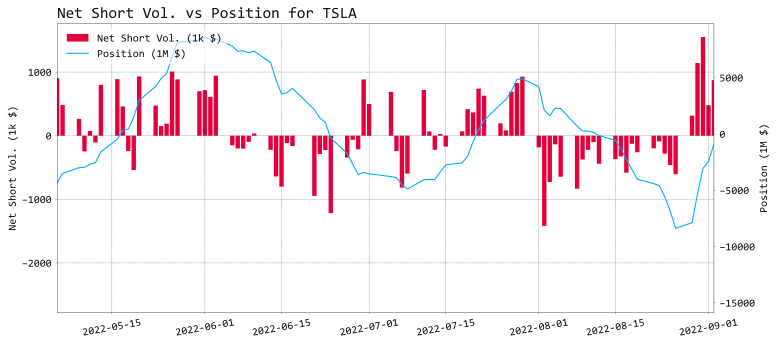

In [14]:
fig, ax1 = plt.subplots(figsize=(11, 5), dpi=150)
ax2 = ax1.twinx()
openbb.stocks.dps.spos(
    symbol,
    limit=84,
    raw=False,
    export="",
    external_axes=[ax1, ax2],
)
fig.tight_layout()

f = io.BytesIO()
fig.savefig(f, format="svg")
net_short_position = f.getvalue().decode("utf-8")

Could not get data

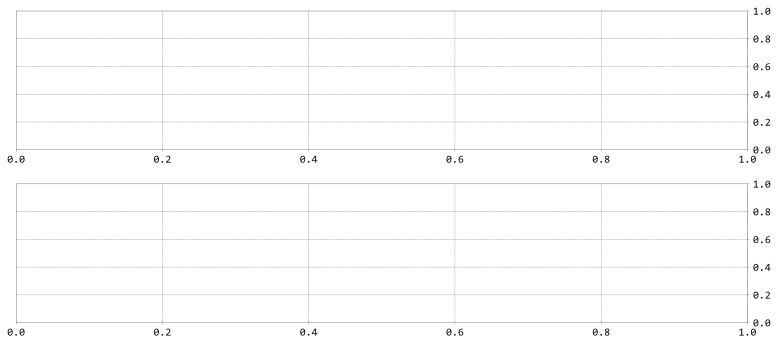

In [15]:
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(11, 5), dpi=150)
openbb.stocks.dps.dpotc(
    symbol=symbol,
    external_axes=[ax1, ax2],
)
fig.tight_layout()

f = io.BytesIO()
fig.savefig(f, format="svg")
dark_pools = f.getvalue().decode("utf-8")

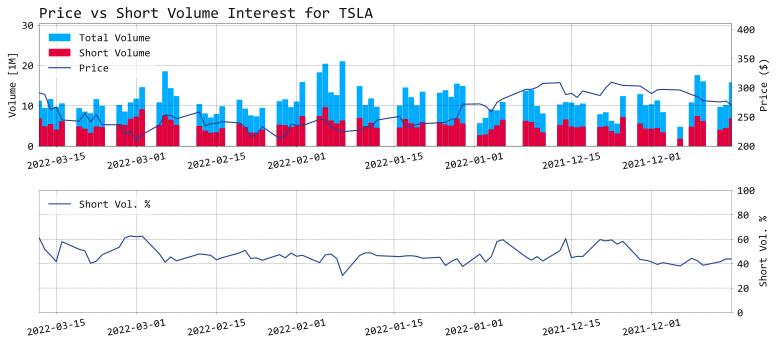

In [16]:
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(11, 5), dpi=150)
ax3 = ax1.twinx()
openbb.stocks.dps.psi_sg(
    symbol,
    external_axes=[ax1, ax2, ax3],
)
fig.tight_layout()

f = io.BytesIO()
fig.savefig(f, format="svg")
price_vs_short_interest = f.getvalue().decode("utf-8")

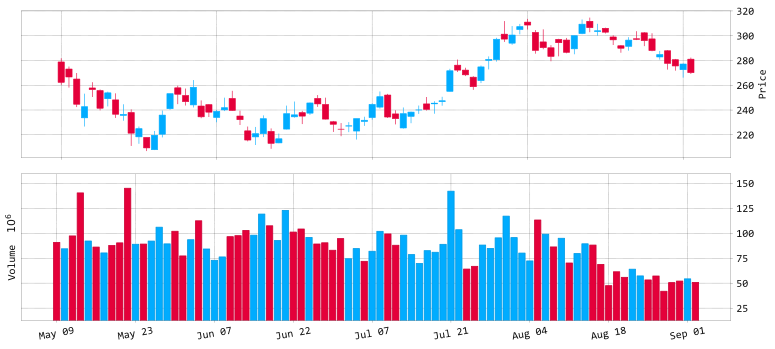

In [17]:
fig, (candles, volume) = plt.subplots(nrows=2, ncols=1, figsize=(11, 5), dpi=150)
openbb.stocks.candle(
    symbol=symbol,
    data=ticker_data,
    use_matplotlib=True,
    external_axes=[candles, volume],
)
candles.set_xticklabels("")
fig.tight_layout()

f = io.BytesIO()
fig.savefig(f, format="svg")
price_chart = f.getvalue().decode("utf-8")

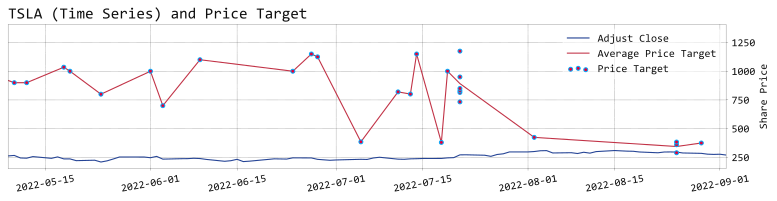

In [18]:
fig, ax = plt.subplots(figsize=(11, 3), dpi=150)
openbb.stocks.dd.pt(
    ticker_data,
    symbol=symbol,
    start_date="2022-01-01",
    limit=10,
    raw=False,
    external_axes=[ax],
)
fig.tight_layout()
f = io.BytesIO()
fig.savefig(f, format="svg")
price_target_chart = f.getvalue().decode("utf-8")

In [87]:
df = openbb.stocks.dd.models.business_insider.get_price_target_from_analysts(symbol)
avg_ratings = 0
days = 30
if not df.empty:
    df_ratings = df[datetime.datetime.now() - datetime.timedelta(days=days) :]
    while df_ratings.empty:
        days += 30
        df_ratings = df[datetime.datetime.now() - datetime.timedelta(days=days) :]
        
        if days > 100:
            break
    
    if not df_ratings.empty:
        avg_ratings = round(np.mean(df_ratings["Price Target"].values), 2)
    else:
        avg_ratings = 0
        
last_price = round(ticker_data["Close"][-1], 2)

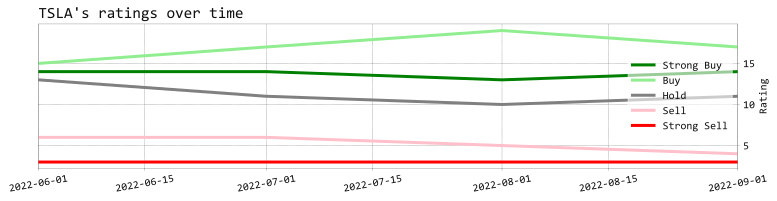

In [20]:
fig, ax = plt.subplots(figsize=(11, 3), dpi=150)
openbb.stocks.dd.rot(
    symbol=symbol,
    limit=10,
    raw=False,
    external_axes=[ax],
)
fig.tight_layout()
f = io.BytesIO()
fig.savefig(f, format="svg")
ratings_over_time_chart = f.getvalue().decode("utf-8")

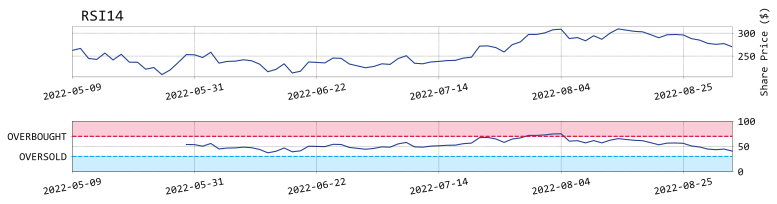

In [21]:
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(11, 3), dpi=150)
openbb.stocks.ta.rsi(ticker_data["Close"], external_axes=[ax1, ax2])
fig.tight_layout()
f = io.BytesIO()
fig.savefig(f, format="svg")
ta_rsi = f.getvalue().decode("utf-8")

In [22]:
df = openbb.stocks.ta.models.momentum.rsi(ticker_data["Close"])
rsi_value = round(df.values[-1][0], 2)
rsi_value

40.54

In [23]:
from sklearn.linear_model import LinearRegression

model = LinearRegression().fit(
    np.array(range(len(ticker_data["Close"][-30:].index))).reshape(-1, 1),
    ticker_data["Close"][-30:].values,
)
regression_slope = round(model.coef_[0], 2)

In [24]:
import pandas as pd

df_insider = pd.DataFrame.from_dict(
    openbb.stocks.ins.models.finviz.get_last_insider_activity(symbol)
).head(10)
df_insider["Val ($)"] = df_insider["Value ($)"].replace({",": ""}, regex=True)
df_insider["Trade"] = df_insider.apply(
    lambda row: (-1 * float(row["Val ($)"]))
    if row["Transaction"] == "Sale"
    else (float(row["Val ($)"]) if row["Transaction"] == "Buy" else 0),
    axis=1,
)
last_10_insider_trading = round(sum(df_insider["Trade"]) / 1_000_000, 2)
df_insider = df_insider.drop(columns=["Val ($)", "Trade"])
df_insider

,Insider Trading,Relationship,Date,Transaction,Cost,#Shares,Value ($),#Shares Total,SEC Form 4
0,Baglino Andrew D,SVP Powertrain and Energy Eng.,Aug 29,Option Exercise,20.91,"10,500","219,555","72,201",Aug 31 07:32 PM
1,Baglino Andrew D,SVP Powertrain and Energy Eng.,Aug 29,Sale,283.00,"10,500","2,971,500","61,701",Aug 31 07:32 PM
2,Wilson-Thompson Kathleen,Director,Aug 01,Option Exercise,44.95,"8,750","393,312","10,550",Aug 02 08:17 PM
3,Wilson-Thompson Kathleen,Director,Aug 01,Sale,904.00,"8,750","7,910,000","1,800",Aug 02 08:17 PM
4,Wilson-Thompson Kathleen,Director,Jul 29,Option Exercise,44.95,"17,500","786,625","19,300",Aug 02 08:17 PM
5,Wilson-Thompson Kathleen,Director,Jul 29,Sale,863.78,"17,500","15,116,150","1,800",Aug 02 08:17 PM
6,Baglino Andrew D,SVP Powertrain and Energy Eng.,Jul 27,Option Exercise,62.72,"3,500","219,520","24,067",Jul 29 08:34 PM
7,Baglino Andrew D,SVP Powertrain and Energy Eng.,Jul 27,Sale,791.50,"3,500","2,770,250","20,567",Jul 29 08:34 PM
8,Musk Kimbal,Director,Jul 25,Option Exercise,74.17,"25,000","1,854,250","536,240",Jul 27 08:31 PM
9,Baglino Andrew D,SVP Powertrain and Energy Eng.,Jun 27,Option Exercise,62.72,"3,500","219,520","24,067",Jun 29 07:05 PM


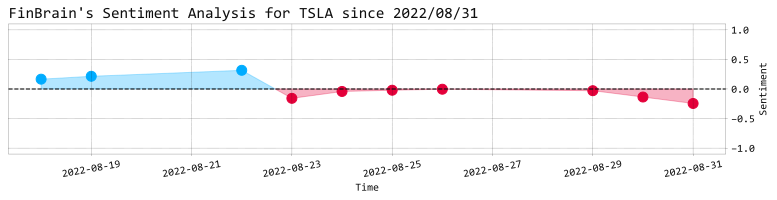

In [25]:
fig, ax = plt.subplots(figsize=(11, 3), dpi=150)
openbb.stocks.ba.headlines(symbol, external_axes=[ax])
fig.tight_layout()
f = io.BytesIO()
fig.savefig(f, format="svg")
finbrain_sentiment = f.getvalue().decode("utf-8")

In [26]:
df_sentiment_finbrain = openbb.stocks.ba.models.finbrain.get_sentiment(symbol)
finbrain_sentiment_val = float(df_sentiment_finbrain.values[-1][0])

In [27]:
(
    watchlist_count,
    n_cases,
    n_bull,
    n_bear,
) = openbb.stocks.ba.models.stocktwits.get_bullbear(symbol)
stocktwits_sentiment = f"Watchlist count: {watchlist_count}</br>"
if n_cases > 0:
    stocktwits_sentiment += f"\nLast {n_cases} sentiment messages:</br>"
    stocktwits_sentiment += f"Bullish {round(100*n_bull/n_cases, 2)}%</br>"
    stocktwits_sentiment += f"Bearish {round(100*n_bear/n_cases, 2)}%"
else:
    stocktwits_sentiment += "No messages found"


1 Failed download:
- TSLA: 15m data not available for startTime=1656457200 and endTime=1662461449. The requested range must be within the last 60 days.


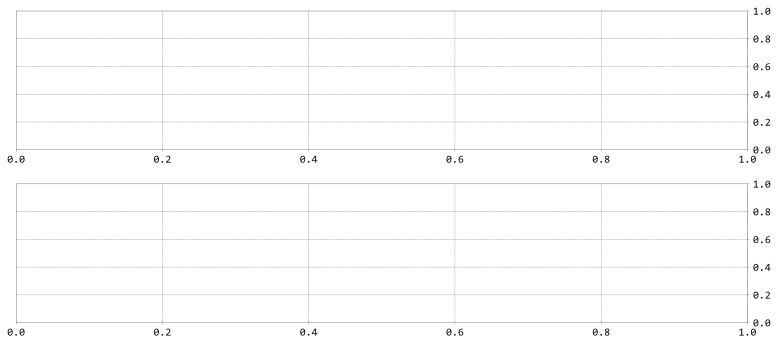

In [28]:
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(11, 5), dpi=150)
openbb.stocks.ba.snews(symbol, external_axes=[ax1, ax2])
fig.tight_layout()
f = io.BytesIO()
fig.savefig(f, format="svg")
snews = f.getvalue().decode("utf-8")

In [29]:
ticker_data_all = openbb.stocks.load(
    symbol, start_date=datetime.datetime.now() - datetime.timedelta(days=5 * 12 * 21)
)
ticker_data_all["Returns"] = ticker_data_all["Adj Close"].pct_change()

Loading Daily TSLA stock with starting period 2019-03-26 for analysis.

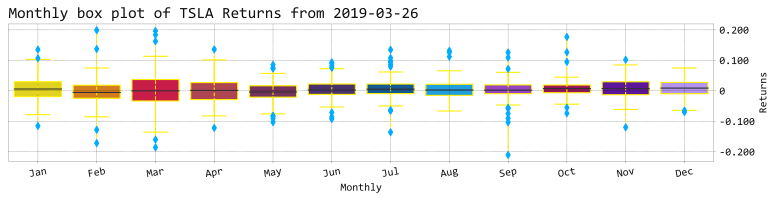

In [30]:
fig, ax = plt.subplots(figsize=(11, 3), dpi=150)
openbb.stocks.qa.bw(ticker_data_all, "Returns", symbol, yearly=False, external_axes=[ax])
fig.tight_layout()
f = io.BytesIO()
fig.savefig(f, format="svg")
bw_month = f.getvalue().decode("utf-8")

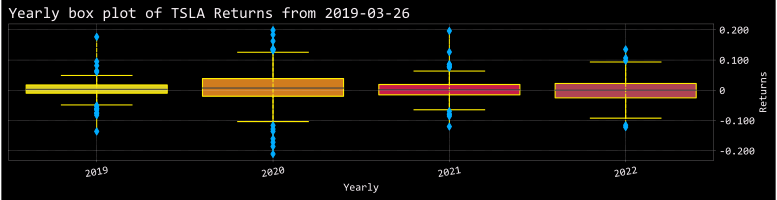

In [31]:
fig, ax = plt.subplots(figsize=(11, 3), dpi=150)
openbb.stocks.qa.bw(ticker_data_all, "Returns", symbol, yearly=True, external_axes=[ax])
fig.tight_layout()
f = io.BytesIO()
fig.savefig(f, format="svg")
bw_year = f.getvalue().decode("utf-8")

In [32]:
if predictions:
    regression_val = round(
        openbb.stocks.pred.models.regression.get_regression_model(
            ticker_data_all["Close"], 1, 80, 20, 1
        )[0][-1],
        2,
    )
    regression_val

       Actual price: 270.21 $       
┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Datetime            ┃ Prediction ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━┩
│ 2022-09-05 00:00:00 │ 270.89 $   │
├─────────────────────┼────────────┤
│ 2022-09-06 00:00:00 │ 278.47 $   │
├─────────────────────┼────────────┤
│ 2022-09-07 00:00:00 │ 280.13 $   │
├─────────────────────┼────────────┤
│ 2022-09-08 00:00:00 │ 274.19 $   │
├─────────────────────┼────────────┤
│ 2022-09-09 00:00:00 │ 264.17 $   │
├─────────────────────┼────────────┤
│ 2022-09-12 00:00:00 │ 268.80 $   │
├─────────────────────┼────────────┤
│ 2022-09-13 00:00:00 │ 260.29 $   │
├─────────────────────┼────────────┤
│ 2022-09-14 00:00:00 │ 257.09 $   │
├─────────────────────┼────────────┤
│ 2022-09-15 00:00:00 │ 260.25 $   │
├─────────────────────┼────────────┤
│ 2022-09-16 00:00:00 │ 267.05 $   │
├─────────────────────┼────────────┤
│ 2022-09-19 00:00:00 │ 267.21 $   │
├─────────────────────┼────────────┤
│ 2022-09-20 00:00:00 │ 266.46 $   │
├─────────────────────┼────────────┤
│ 2022-09-21 00:00:00 │ 272.56 $   │
├─────────────────────┼────────────┤
│ 2022-09-22 00:00:00 │ 270.36 $   │
├─────────────────────┼────────────┤
│ 2022-09-23 00:00:00 │ 268.05 $   │
├─────────────────────┼────────────┤
│ 2022-09-26 00:00:00 │ 260.87 $   │
├─────────────────────┼────────────┤
│ 2022-09-27 00:00:00 │ 268.97 $   │
├─────────────────────┼────────────┤
│ 2022-09-28 00:00:00 │ 265.54 $   │
├─────────────────────┼────────────┤
│ 2022-09-29 00:00:00 │ 270.06 $   │
├─────────────────────┼────────────┤
│ 2022-09-30 00:00:00 │ 268.27 $   │
└─────────────────────┴────────────┘

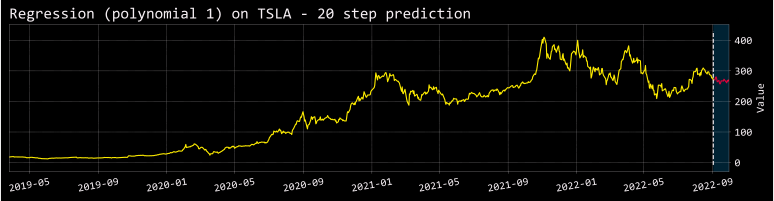

In [33]:
if predictions:
    fig, ax = plt.subplots(figsize=(11, 3), dpi=150)
    openbb.stocks.pred.regression(
        symbol, ticker_data_all["Close"], 1, 80, 20, 1, external_axes=[ax]
    )
    fig.tight_layout()
    f = io.BytesIO()
    fig.savefig(f, format="svg")
    regression = f.getvalue().decode("utf-8")

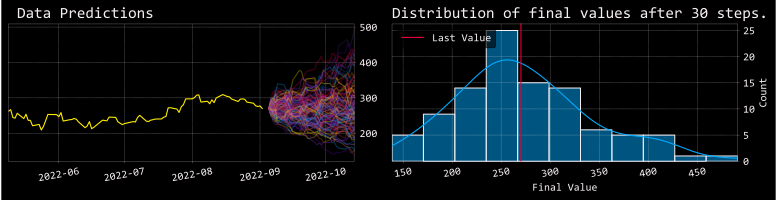

In [34]:
if predictions:
    fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(11, 3), dpi=150)
    openbb.stocks.pred.mc(ticker_data["Close"], 30, 100, external_axes=[ax1, ax2])
    fig.tight_layout()
    f = io.BytesIO()
    fig.savefig(f, format="svg")
    mc = f.getvalue().decode("utf-8")

       Actual price: 270.21 $       
┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Datetime            ┃ Prediction ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━┩
│ 2022-09-05 00:00:00 │ 270.89 $   │
├─────────────────────┼────────────┤
│ 2022-09-06 00:00:00 │ 278.47 $   │
├─────────────────────┼────────────┤
│ 2022-09-07 00:00:00 │ 280.13 $   │
├─────────────────────┼────────────┤
│ 2022-09-08 00:00:00 │ 274.19 $   │
├─────────────────────┼────────────┤
│ 2022-09-09 00:00:00 │ 264.17 $   │
├─────────────────────┼────────────┤
│ 2022-09-12 00:00:00 │ 268.80 $   │
├─────────────────────┼────────────┤
│ 2022-09-13 00:00:00 │ 260.29 $   │
├─────────────────────┼────────────┤
│ 2022-09-14 00:00:00 │ 257.09 $   │
├─────────────────────┼────────────┤
│ 2022-09-15 00:00:00 │ 260.25 $   │
├─────────────────────┼────────────┤
│ 2022-09-16 00:00:00 │ 267.05 $   │
├─────────────────────┼────────────┤
│ 2022-09-19 00:00:00 │ 267.21 $   │
├─────────────────────┼────────────┤
│ 2022-09-20 00:00:00 │ 266.46 $   │
├─────────────────────┼────────────┤
│ 2022-09-21 00:00:00 │ 272.56 $   │
├─────────────────────┼────────────┤
│ 2022-09-22 00:00:00 │ 270.36 $   │
├─────────────────────┼────────────┤
│ 2022-09-23 00:00:00 │ 268.05 $   │
├─────────────────────┼────────────┤
│ 2022-09-26 00:00:00 │ 260.87 $   │
├─────────────────────┼────────────┤
│ 2022-09-27 00:00:00 │ 268.97 $   │
├─────────────────────┼────────────┤
│ 2022-09-28 00:00:00 │ 265.54 $   │
├─────────────────────┼────────────┤
│ 2022-09-29 00:00:00 │ 270.06 $   │
├─────────────────────┼────────────┤
│ 2022-09-30 00:00:00 │ 268.27 $   │
└─────────────────────┴────────────┘

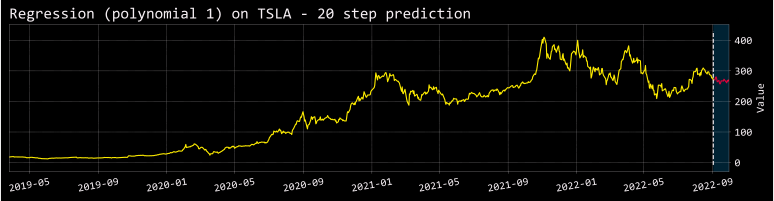

In [35]:
if predictions:
    fig, ax = plt.subplots(figsize=(11, 3), dpi=150)
    openbb.stocks.pred.regression(
        symbol, ticker_data_all["Close"], 1, 80, 20, 1, external_axes=[ax]
    )
    fig.tight_layout()
    f = io.BytesIO()
    fig.savefig(f, format="svg")
    regression = f.getvalue().decode("utf-8")

## Render the report template to a file

In [43]:
body = ""
body += openbb.widgets.header(
    openbb_img="./openbb_terminal/reports/OpenBB_reports_logo.png",
    floppy_disk_img="./openbb_terminal/reports/floppy-disc.png",
    author=author,
    report_date=report_date,
    report_time=report_time,
    report_tz=report_tz,
    title=f"<b>{report_title}</b>",
)

body += openbb.widgets.tablinks(
    [
        "SUMMARY",
        "Overview",
        "Analyst Opinions",
        "Fundamental Analysis",
        "Dark Pool and Shorts",
        "Technical Analysis",
        "Insider Trading",
        "Behavioural Analysis",
        "Quantitative Analysis",
        "Prediction Techniques",
    ]
)

htmlcode = openbb.widgets.h(3, "KPIs")

if avg_ratings > 0:
    htmlcode += openbb.widgets.kpi(
        [last_price],
        [
            f"Last closing price is above the average price ratings of last {days} days",
            f"Average price ratings of last {days} days is above last closing price",
        ],
        avg_ratings,
    )
if predictions:
    htmlcode += openbb.widgets.kpi(
        [0],
        [
            "Regression (dollars per market day) on last 30 market days is negative",
            "Regression (dollars per market day) on last 30 market days is positive",
        ],
        regression_slope,
    )
htmlcode += openbb.widgets.kpi(
    [30, 70],
    ["RSI level is oversold", "RSI level is normal", "RSI level is overbought"],
    rsi_value,
)
htmlcode += openbb.widgets.kpi(
    [0],
    [
        "The sum of last 10 insider trading (in millions) was negative",
        "The sum of last 10 insider trading (in millions) was positive",
    ],
    last_10_insider_trading,
)
htmlcode += openbb.widgets.kpi(
    [-0.1, 0.1],
    [
        "Last FinBrain sentiment is bearish",
        " Last FinBrain sentiment is neutral",
        "Last FinBrain sentiment is bullish",
    ],
    finbrain_sentiment_val,
)
if predictions:
    htmlcode += openbb.widgets.kpi(
        [0],
        [
            "The regression for the next 20th market price is below closing price",
            "The regression for the next 20th market price is above closing price",
        ],
        round(regression_val - last_price, 2),
    )
body += openbb.widgets.add_tab("SUMMARY", htmlcode)

htmlcode = openbb.widgets.row([price_chart])
htmlcode += openbb.widgets.row(
    [openbb.widgets.h(3, "Description") + openbb.widgets.p(overview)]
)
body += openbb.widgets.add_tab("Overview", htmlcode)

htmlcode = openbb.widgets.row([price_target_chart])
htmlcode += openbb.widgets.row([ratings_over_time_chart])
htmlcode += openbb.widgets.row([df_analyst.to_html()])
body += openbb.widgets.add_tab("Analyst Opinions", htmlcode)

htmlcode = openbb.widgets.row(
    [openbb.widgets.h(3, "Estimates") + df_year_estimates.head().to_html()]
)
htmlcode += openbb.widgets.row(
    [openbb.widgets.h(3, "Earnings") + df_quarter_earnings.head().to_html()]
)
htmlcode += openbb.widgets.row(
    [openbb.widgets.h(3, "Revenues") + df_quarter_revenues.head().to_html()]
)
htmlcode += openbb.widgets.row(
    [openbb.widgets.h(3, "SEC filings") + df_sec_filings.to_html(escape=False)]
)
body += openbb.widgets.add_tab("Fundamental Analysis", htmlcode)

htmlcode = openbb.widgets.row([net_short_position])
htmlcode += openbb.widgets.row([price_vs_short_interest])
htmlcode += openbb.widgets.row([dark_pools])
body += openbb.widgets.add_tab("Dark Pool and Shorts", htmlcode)

body += openbb.widgets.add_tab("Technical Analysis", openbb.widgets.row([ta_rsi]))

htmlcode = openbb.widgets.row(
    [
        openbb.widgets.h(3, "Last Activity")
        + df_insider.head(10).to_html(col_space="75px")
    ]
)
body += openbb.widgets.add_tab("Insider Trading", htmlcode)

htmlcode = openbb.widgets.row([finbrain_sentiment])
htmlcode += openbb.widgets.row([snews])
htmlcode += openbb.widgets.row(
    [openbb.widgets.h(3, "Stocktwits") + stocktwits_sentiment]
)
body += openbb.widgets.add_tab("Behavioural Analysis", htmlcode)

htmlcode = openbb.widgets.row([bw_month])
htmlcode += openbb.widgets.row([bw_year])
body += openbb.widgets.add_tab("Quantitative Analysis", htmlcode)

if predictions:
    htmlcode = openbb.widgets.row([regression])
    htmlcode += openbb.widgets.row([mc])
else:
    htmlcode = openbb.widgets.row(["Prediction features not enabled."])
body += openbb.widgets.add_tab("Prediction Techniques", htmlcode)

body += openbb.widgets.tab_clickable_and_save_evt()

report = openbb.widgets.html_report(
    title=report_name, 
    stylesheet=openbb.widgets.html_report_stylesheet(), 
    body=body
)

# to save the results
with open(report_name + ".html", "w", encoding="utf-8") as fh:
    fh.write(report)